<a href="https://colab.research.google.com/github/Yunhua468/Stochastic-Opetimization/blob/franz/problem5_3_example_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import random
import matplotlib.pyplot as plt

random.seed(42)

# Problem 5.3

## Underlying markov process

$$\mathbb{P}(\xi_{n+1}=1|\xi_n=0,\theta)=\theta$$
$$\mathbb{P}(\xi_{n+1}=1|\xi_n=1,\theta)=\theta^2$$

In [15]:
class markov_xi(object):
  
  def __init__(self):
    self.last_state = 0

  def __call__(self, theta):
    p01 = theta
    p11 = theta*theta
    current_state = None
    if self.last_state == 0:
      if random.random() < p01:
        current_state = 1
      else:
        current_state = 0
    else:
        if random.random() < p11:
          current_state = 1
        else:
          current_state = 0
    self.last_state = current_state
    return current_state

In [16]:
def take(generator, n, theta):
  # take n samples from the generator
  for i in range(n):
    yield generator(theta)

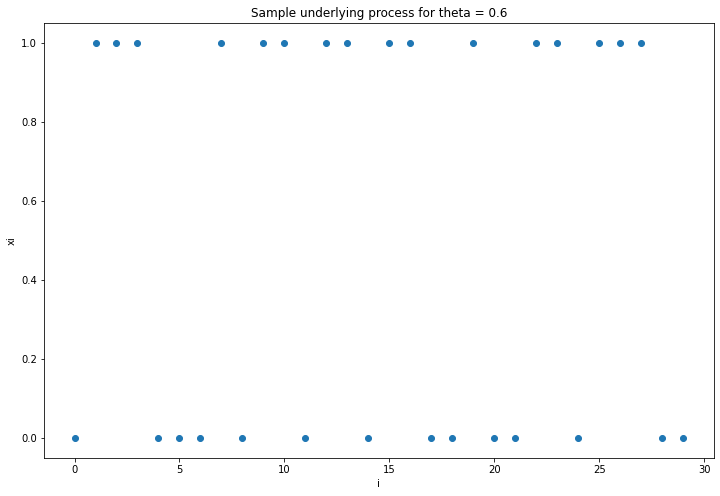

In [17]:
theta = 0.6
xi = markov_xi()
y = list(take(xi, n=30, theta = theta))
x = list(range(len(y)))
plt.figure(figsize=(12, 8))
plt.title('Sample underlying process for theta = {}'.format(theta))
plt.plot(x, y, 'o')
plt.xlabel('i')
plt.ylabel('xi')
plt.show()

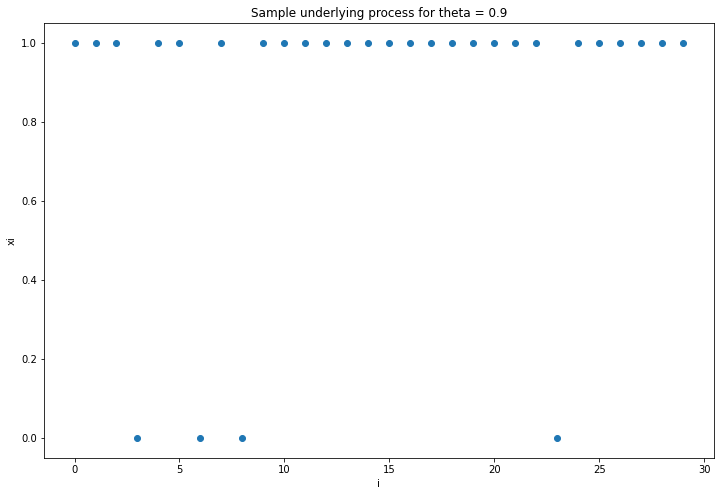

In [18]:
theta = 0.9
xi = markov_xi()
y = list(take(xi, n=30, theta = theta))
x = list(range(len(y)))
plt.figure(figsize=(12, 8))
plt.title('Sample underlying process for theta = {}'.format(theta))
plt.plot(x, y, 'o')
plt.xlabel('i')
plt.ylabel('xi')
plt.show()

# Feedback function 

In [19]:
def feedback(xi, theta, K, alpha):
  assert K > 0
  return 200*sum(take(xi, n=K, theta=theta)) - K*alpha

# Stochastic approximation

In [44]:
def approximate(xi, epsilon, K=1, alpha=150, theta0 = 0.6, iterations=100):
  theta = theta0
  thetas = []
  for n in range(iterations):
    theta -= epsilon(n)*feedback(xi, theta=theta, K=K, alpha=alpha)
    if theta < 0.5:
      theta = 0.5
    if theta > 1.0:
      theta = 1.0
    thetas.append(theta)
  return thetas

# Fixed $\epsilon$

In [51]:
epsilon = lambda n: 0.00001

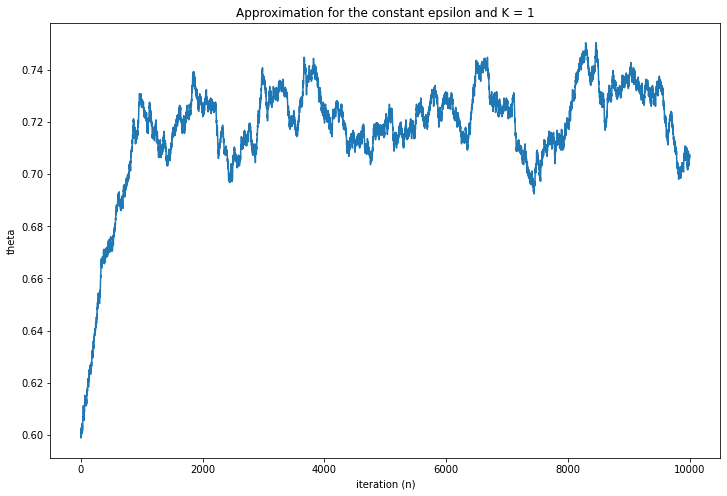

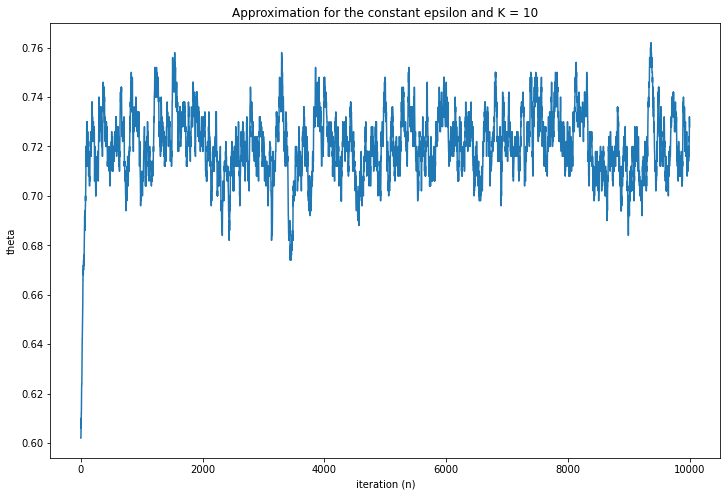

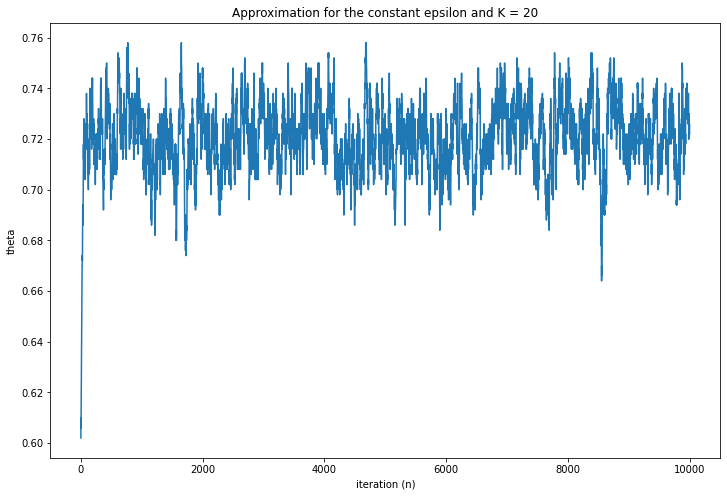

In [52]:
for K in [1, 10, 20]:
  random.seed(42)
  xi = markov_xi()
  thetas = approximate(xi, epsilon, K=K, alpha=120, theta0=0.6, iterations=10000)
  ns = list(range(len(thetas)))

  plt.figure(figsize=(12, 8))
  plt.title('Approximation for the constant epsilon and K = {}'.format(K))
  plt.plot(ns, thetas)
  plt.xlabel('iteration (n)')
  plt.ylabel('theta')
  plt.show()

# $\epsilon = \mathcal{O}(\frac{1}{n})$

In [70]:
epsilon = lambda n: 1 / (n+10000.0)

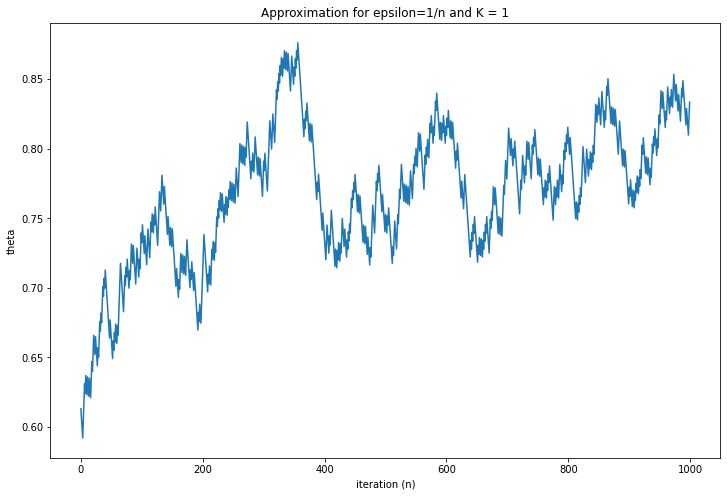

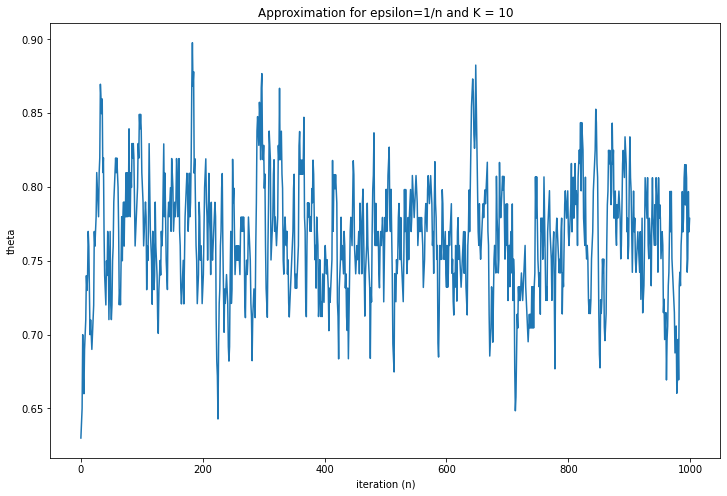

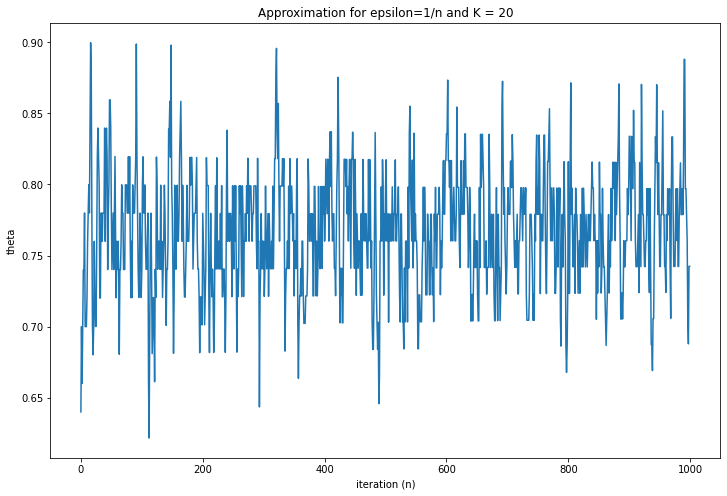

In [72]:
for K in [1, 10, 20]:
  random.seed(42)
  xi = markov_xi()
  thetas = approximate(xi, epsilon, K=K, alpha=130, theta0=0.6, iterations=1000)
  ns = list(range(len(thetas)))

  plt.figure(figsize=(12, 8))
  plt.title('Approximation for epsilon=1/n and K = {}'.format(K))
  plt.plot(ns, thetas)
  plt.xlabel('iteration (n)')
  plt.ylabel('theta')
  plt.show()